In [1]:
from mitotnt.load_graph import *
from mitotnt.track_fragments import *
from collections import defaultdict
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
import glob
from mayavi import mlab
mlab.options.offscreen = True
plt.rcParams['figure.figsize'] = [20, 30]
from ipywidgets import *
# mlab.init_notebook(backend='png')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Set data paths
rootpath = 'test_data/mitotnt_outputs/WithoutSeg'
savedir = 'test_data/mitotnt_outputs/tracked_output_images/'
cell_id = '/DMSO-Control/tracks_with_graph_unique_indexing_cell_4.csv'

reachability_dict = defaultdict(lambda : defaultdict(list))
reachability_list = [[], [], []]
reachability_ratio_dict = defaultdict(list)

reachabilityArray = []
IntersectionArray = []
EuclideanArray = []

Plotting frame 10 for DMSO-Control cell_4


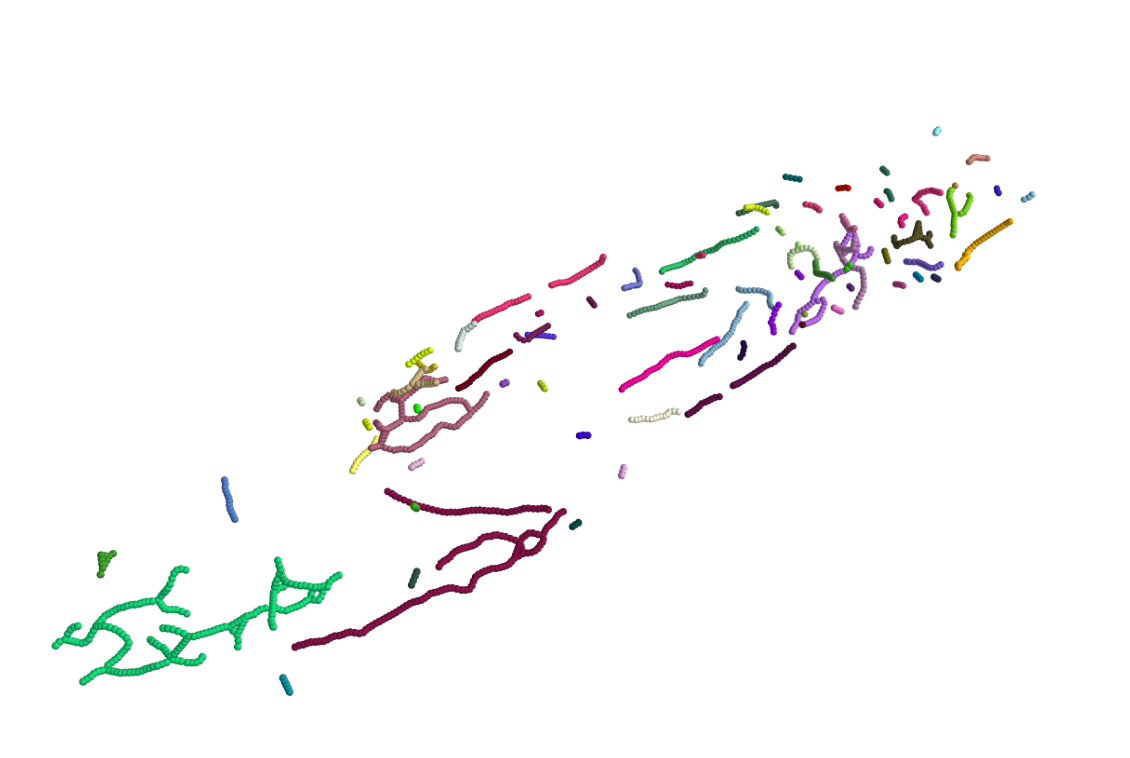

In [4]:
# Plot full network, i.e. first 100 fragments
scales = {'Oligomycin':0.0025, 'DMSO-Control':0.025, 'Nocodazole':0.025, 'MDIVI-1':0.025}
frame = 10
view_params=(60, -40, 400)
frag_range = range(0, 100)

GLG = GraphLoader(rootpath + cell_id, 'unique')
graph_object_frame_0 = GLG.createFrameGraph(frame=0)
print('Plotting frame {} for'.format(frame), cell_id.split('/')[1], cell_id.split('.')[0][-6:])
savepath = savedir + cell_id.split('/')[1] + '/'+ cell_id.split('.')[0][-6:]
start_frame=0
delta=1
timesteps = frame
plotSnapshot(rootpath, cell_id, start_frame=start_frame, timesteps = timesteps, 
    scale=scales[cell_id.split('/')[1]], n_fragments = 100, frag_range=frag_range, delta=delta, 
    plot_metrics=False, savepath=savepath, mode='cumulative', show=True, view_params = view_params)
plt.show()

Plotting frame 10 for DMSO-Control cell_4


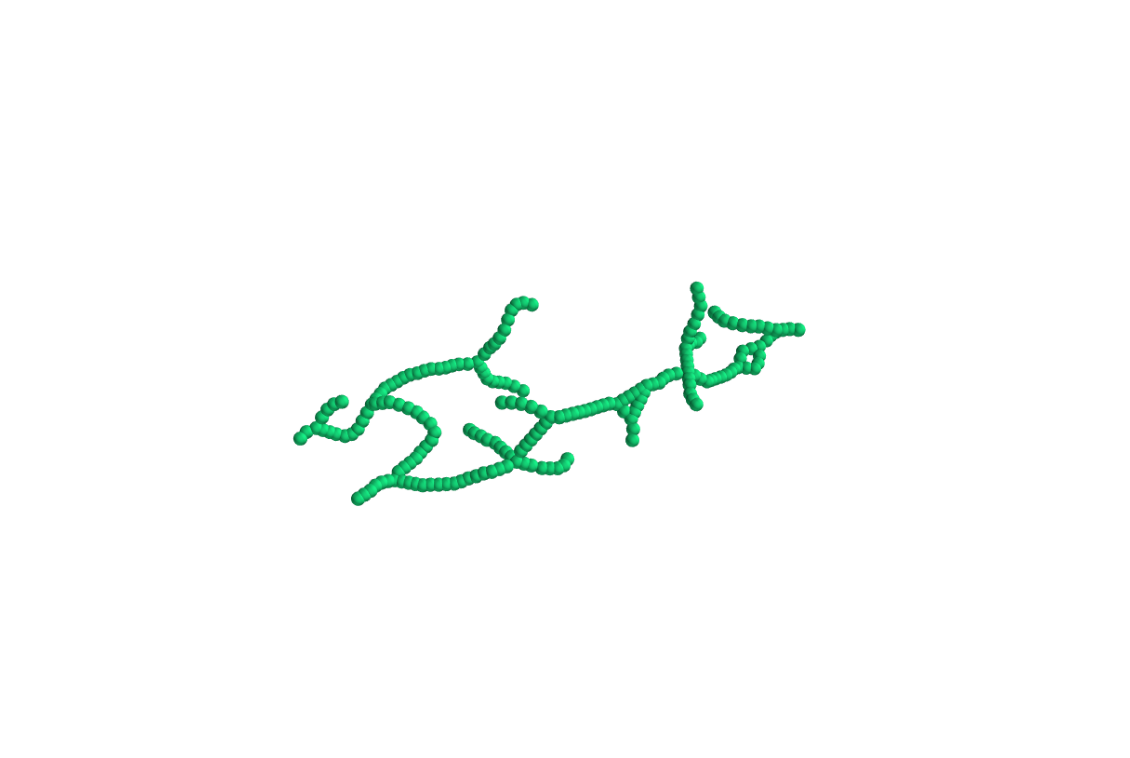

In [5]:
# Plot individual fragment

scales = {'Oligomycin':0.0025, 'DMSO-Control':0.025, 'Nocodazole':0.025, 'MDIVI-1':0.025}
frame = 10
view_params=(60, -40, 200)
frag_range = [0]

GLG = GraphLoader(rootpath + cell_id, 'unique')
graph_object_frame_0 = GLG.createFrameGraph(frame=0)
print('Plotting frame {} for'.format(frame), cell_id.split('/')[1], cell_id.split('.')[0][-6:])
savepath = savedir + cell_id.split('/')[1] + '/'+ cell_id.split('.')[0][-6:]
start_frame=0
delta=1
timesteps = frame
plotSnapshot(rootpath, cell_id, start_frame=start_frame, timesteps = timesteps, 
    scale=scales[cell_id.split('/')[1]], n_fragments = 100, frag_range=frag_range, delta=delta, 
    plot_metrics=False, savepath=savepath, mode='cumulative', show=True, view_params = view_params)
plt.show()

In [ ]:
# Plot full cascade, i.e. first 100 fragments
%matplotlib notebook

scales = {'Oligomycin':0.0025, 'DMSO-Control':0.025, 'Nocodazole':0.025, 'MDIVI-1':0.025}
view_params=(60, -40, 400)
frag_range = range(0, 100)

GLG = GraphLoader(rootpath + cell_id, 'unique')
graph_object_frame_0 = GLG.createFrameGraph(frame=0)
print('Tracking fragments and plotting cascade for', cell_id.split('/')[1], cell_id.split('.')[0][-6:])
savepath = savedir + cell_id.split('/')[1] + '/'+ cell_id.split('.')[0][-6:]
start_frame=0
delta=1
timesteps = 60

fragment_id_csv = 'fragment_ids.csv'

plotCascade(rootpath, cell_id, start_frame=start_frame, timesteps = timesteps, 
    scale=scales[cell_id.split('/')[1]], n_fragments = 100, frag_range=frag_range, delta=delta, 
    plot_metrics=False, savepath=savepath, mode='cumulative', view_params = view_params, get_frag_ids = True,
    fragment_id_savefile=fragment_id_csv)

fig = plt.figure(figsize=(9, 6))

@interact(frame = (0, timesteps-2))
def update(frame = 0):
    image = plt.imread(savepath + '/frame_{}.png'.format(frame))
    plt.imshow(image)
    fig.canvas.draw()


Tracking fragments and plotting cascade for DMSO-Control cell_4


  0%|          | 0/59 [00:00<?, ?it/s]/home/parth/Projects/PyLattice/MitoTNT/mitotnt/track_fragments.py:236: RuntimeWarning: invalid value encountered in double_scalars
  weighted_centroid = np.nansum(np.array([np.array(tracked_components[frag_index][1].positionDict[k])*tracked_components[frag_index][1].intensityDict[k] for k in
  3%|▎         | 2/59 [00:12<05:52,  6.18s/it]

In [ ]:
rootpath = 'test_data/mitotnt_outputs/WithSeg'
savedir = 'test_data/mitotnt_outputs/tracked_output_images/'
cell_id = '/DMSO-Control/final_unique_tracks_2.csv'

# Track Segments
%matplotlib notebook

scales = {'Oligomycin':0.0025, 'DMSO-Control':0.025, 'Nocodazole':0.025, 'MDIVI-1':0.025}
view_params=(60, -40, 400)
frag_range = range(11, 12)

GLG = GraphLoader(rootpath + cell_id, 'unique')
graph_object_frame_0 = GLG.createFrameGraph(frame=0)
print('Tracking segments and plotting cascade ...')

start_frame=0
delta=1
timesteps = 10
savepath = savedir + cell_id.split('/')[1] + '/'+ cell_id.split('.')[0][-6:]

fragment_id_csv = 'fragment_ids.csv'

plotCascade(rootpath, cell_id, start_frame=start_frame, timesteps = timesteps, 
    scale=scales[cell_id.split('/')[1]], n_fragments = 100, frag_range=frag_range, delta=delta, 
    plot_metrics=False, savepath=savepath, mode='cumulative', view_params = view_params, get_frag_ids = True,
    fragment_id_savefile=fragment_id_csv, track='segment')

fig = plt.figure(figsize=(9, 6))

@interact(frame = (0, timesteps-2))
def update(frame = 0):
    image = plt.imread(savepath + '/frame_{}.png'.format(frame))
    plt.imshow(image)
    fig.canvas.draw()
